## How to Set Up R Kernel in Jupyter Lab

#### Start R and Install IRkernel in R

install.packages("IRkernel")

#### Run IRkernel in R to make IRkernel available to Jupyter Lab

IRkernel::installspec()

## Install R packages

In [1]:
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/35/l9w_4lq96xx8t8mcq24p76n40000gp/T//Rtmpw0aZyX/downloaded_packages


In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("phyloseq")
BiocManager::install("microbiome")

#### Load R packages

In [2]:
library(phyloseq)
library(ggplot2)
library(microbiome)


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform




#### Set a working directory

In [3]:
setwd('/Users/srjun/MyCourses/BMIG6202/Lab/picrust2')

**note** that you need to change this line according to your setup.

#### Remove objects in your workspace

In [4]:
rm(list=ls())

#### Set up your theme

In [5]:
theme_set(theme_bw())

#### Read pathway-table and create an otu_table-class object

In [7]:
feat.table <- read.table('chemerin_16S/pathways_out/path_abun_unstrat.tsv.gz',
                          header=T, row.names=1, sep='\t', quote="", comment.char="",
                          stringsAsFactors=F, check.names=F)
fttable <- otu_table(feat.table, taxa_are_rows=TRUE)

**note** that you need to change this line according to your setup.

#### Read metadata and create a sample_data-class object

In [8]:
meta <- read.table("chemerin_16S/metadata.tsv", header=T, sep='\t', stringsAsFactors=F, check.names=F)
rownames(meta) <- meta[, 1]
meta <- sample_data(meta)

**note** that you need to change this line according to your setup.

#### Create a phyloseq object

In [9]:
ps.obj <- phyloseq(fttable, meta)

#### Centered log-ratio (clr) transformation using transform in microbiome

In [10]:
ps.obj.clr <- transform(ps.obj, "clr")

In [11]:
otu_table(ps.obj.clr)[1:5, 1:6]

,100CHE6KO,101CHE6WT,102CHE6WT,103CHE6KO,104CHE6KO,20CMK6KO
1CMET2-PWY,1.738129,2.0369878,1.566470,1.643507,1.637106,1.444924
ANAEROFRUCAT-PWY,1.383897,2.0896015,1.561624,1.530904,1.479860,1.421808
ANAGLYCOLYSIS-PWY,1.889765,2.2320128,1.790967,1.827342,1.800859,1.641950
ARG+POLYAMINE-SYN,-5.472637,-1.3456373,-1.709934,-2.182427,-2.155187,-5.785684
ARGORNPROST-PWY,-1.259113,-0.6308725,-1.977807,-5.555155,-2.415860,-5.785684


#### Perform PCA

In [12]:
ps.obj.clr.ord <- ordinate(ps.obj.clr, "RDA")

In [13]:
head(ps.obj.clr.ord$CA$eig)

PC1        PC2        PC3        PC4        PC5        PC6 
172.772652  32.891877  22.798842  11.576190   7.316280   4.941553

In [14]:
pcs <- sapply(ps.obj.clr.ord$CA$eig, function(x) x/sum(ps.obj.clr.ord$CA$eig))
pcs <- as.data.frame(pcs)
pcs

,pcs
,<dbl>
PC1,6.573962e-01
PC2,1.251529e-01
PC3,8.674910e-02
PC4,4.404715e-02
PC5,2.783829e-02
PC6,1.880250e-02
PC7,1.083336e-02
PC8,7.521252e-03
PC9,7.371591e-03


#### To determine which dimenstion would be enough

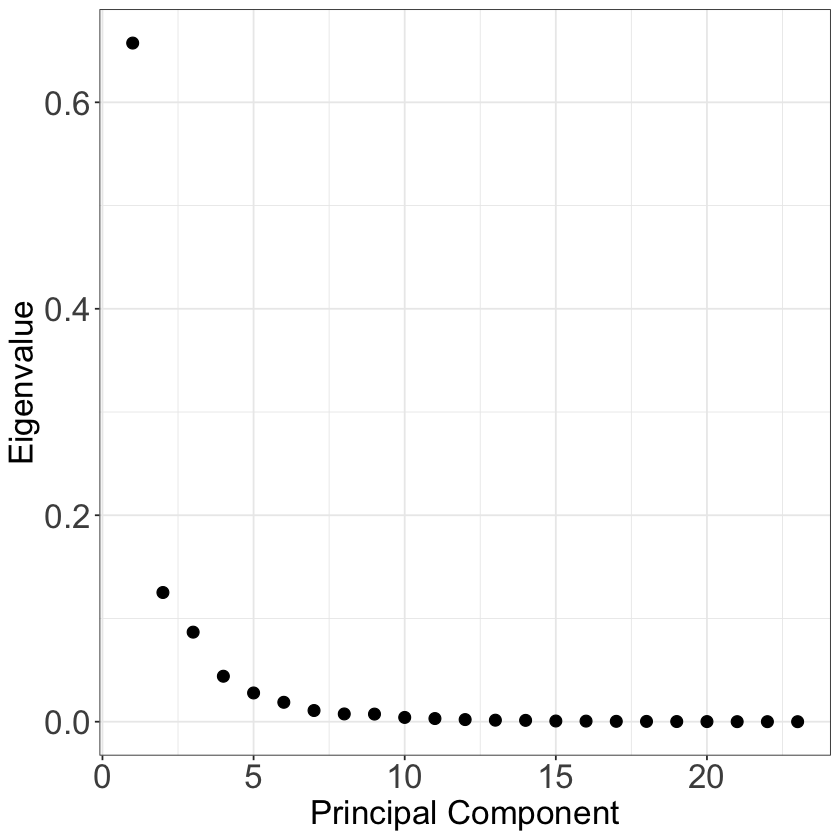

In [15]:
p <- ggplot(pcs, aes(x=seq(1,23), y=pcs)) + 
     geom_point(size=3) +
     xlab("Principal Component") +
     ylab("Eigenvalue") +
     theme(axis.text=element_text(size=20),
           axis.title=element_text(size=20))
p

#### To generate a PCA plot

In [16]:
p <- plot_ordination(ps.obj.clr, ps.obj.clr.ord, axes=1:2, type="samples", color="Genotype") +
     geom_point(size=5) +
     scale_fill_manual(values=c('coral','cornflowerblue')) +
     scale_color_manual(values=c('coral','cornflowerblue')) +
     ggtitle("Principal Component Analysis") +
     theme(plot.title=element_text(size=18,colour="black",hjust=0.5,vjust=0.5),
           panel.grid.major=element_blank(),
           panel.grid.minor=element_blank(),
           panel.background=element_blank(),
           axis.text.x=element_text(colour="black", size=14),
           axis.text.y=element_text(colour="black", size=14),
           axis.title.x=element_text(colour="black",size=18),
           axis.title.y=element_text(colour="black",size=18),
           legend.title=element_text(size=18),
           legend.text=element_text(size=18)
     )

**note** that you need to change this line according to your metadata.

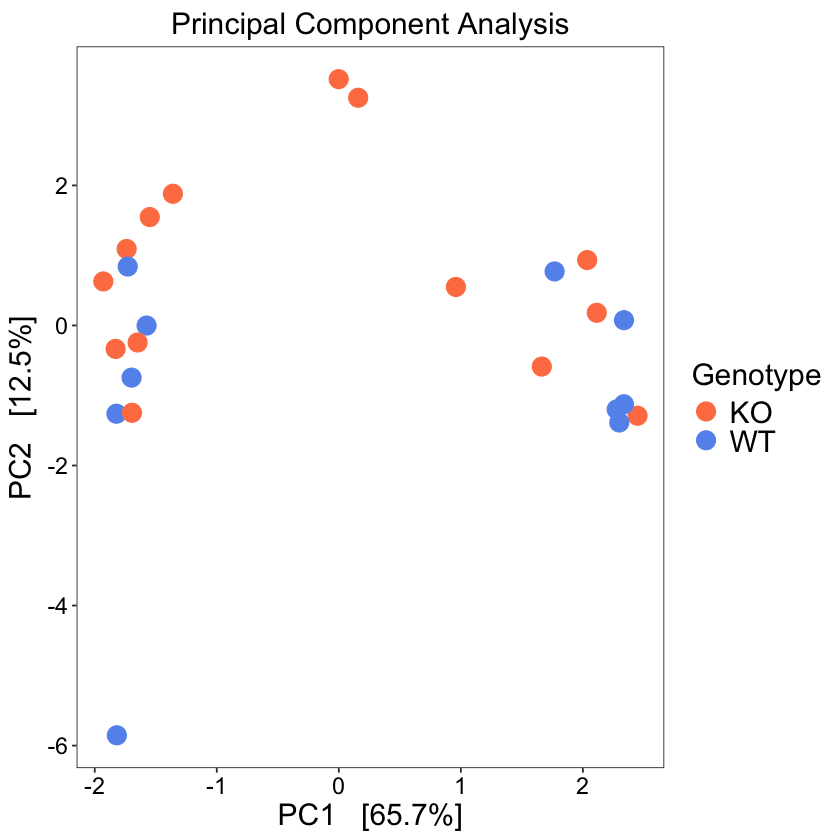

In [17]:
p